In [134]:
%load_ext autoreload
%autoreload 2

In [136]:
from functions.get_kaggle_data import *
from functions.import_to_df import *
from functions.process_data import *

In [137]:
import pandas as pd 
import pandas_profiling as pdp
import numpy as np
import pprint as pp
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [4]:
files = get_kaggle_data(
    competition="commonlitreadabilityprize"
    )

files downloaded for commonlitreadabilityprize competition
   test.csv
   train.csv
   sample_submission.csv
located in /competition_data/


In [5]:
input_data = import_to_df(files)

In [6]:
input_data.keys()

dict_keys(['test', 'train', 'sample_submission'])

In [7]:
train_df = input_data['train']

In [181]:
profile = pdp.ProfileReport(train_df)
profile.to_file(output_file='PandasProfileTrain.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 202.80it/s]


In [182]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


Dont need legal or licence stuff - not relevant and not in test data.  
Excerpt and target only for training.  
Error of previous ratings to be used for understanding data not for training. 

Lets check out error vs target.  


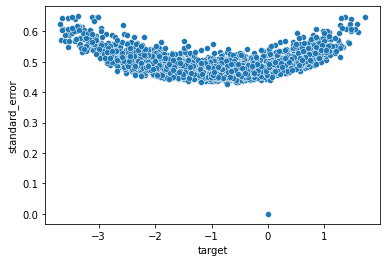

In [183]:
ax = sns.scatterplot(y="standard_error", x="target", data=train_df)

Wow. Error increases as diverge from -1 target.  
Hopefully my predictions will fall in middle of curve.  
Whats going on with the outlier?

In [184]:
train_df[
    (train_df['standard_error'] == 0) 
    & (train_df['target'] == 0)]

,id,url_legal,license,excerpt,target,standard_error
106,436ce79fe,NaN,NaN,"The sun was shining in a cloudless sky, and no...",0.0,0.0


Dont't really trust that data point, maybe it makes more sense to take it out

In [185]:
trim_train_df = train_df[
    ~(train_df['standard_error'] == 0) 
    & ~(train_df['target'] == 0)]

    

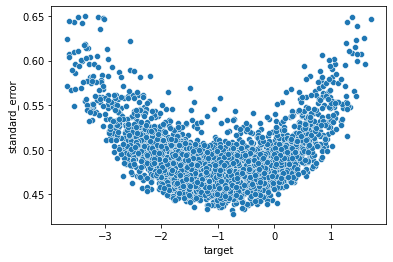

In [187]:
ax = sns.scatterplot(y="standard_error", x="target", data=trim_train_df)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
TOKENS_BASIC = '\\S+(?=\\s+)'
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_BASIC)

In [188]:
vec_alphanumeric.fit(trim_train_df['excerpt'][0:1])

CountVectorizer(token_pattern='\\S+(?=\\s+)')

In [189]:
msg = "There are {} tokens in exercpt if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 108 tokens in exercpt if we split on non-alpha numeric
['a', 'also', 'an', 'and', 'appearance.', 'at', 'ballroom,', 'bear-skin', 'beautiful', 'been', 'boys', 'boys.', 'branches.', 'bumps', 'but']


In [226]:
test = process_data(train_df)

In [227]:
test.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_avg_word_length,avg_sentence_length_chars,avg_sentence_length_words,"excerpt_avg_,_per_sentence",excerpt_avg_;_per_sentence,excerpt_avg_'_per_sentence,"excerpt_avg_""_per_sentence"
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,4.547486,80.916667,14.916667,1.166667,0.000000,0.000000,0.000000
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,4.550296,50.500000,9.666667,1.333333,0.000000,0.166667,0.666667
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,4.475904,68.307692,13.076923,1.307692,0.153846,0.307692,0.769231
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,4.548780,150.000000,27.333333,3.833333,0.333333,0.000000,0.000000
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,3.925170,119.000000,24.500000,2.166667,1.666667,0.000000,0.000000


In [193]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1

In [199]:
gen = infinite_sequence()



0

In [208]:
class RomanNumerals:
    roman_to_int = {
        'I': '1',
        'V': '5',
        'X': '10',
        'L': '50',
        'C': '100',
        'D': '500',
        'M': '1000',
    }
    int_to_roman = {v: k for k, v in roman_to_int.items()}
    
    def to_roman(i):
        result = ''
        for e, c in enumerate(reversed(str(i))):
            if c != 0:
                result += int_to_roman[c]
        return result


In [215]:
roman_to_int = {
    'I': '1',
    'V': '5',
    'X': '10',
    'L': '50',
    'C': '100',
    'D': '500',
    'M': '1000',
}
int_to_roman = {v: k for k, v in roman_to_int.items()}
string = '1000'
def to_roman(i):
    result = ''
    for e, c in enumerate(reversed(str(i))):
        if c != '0':
            if c in (4, 9):
                #subtract from next char
                pass
            else:
                # lu 5 or 1 and 
            lu = c + '0' * e
            result += int_to_roman[lu]
    return result


In [217]:
to_roman(1990)

KeyError: '90'

In [ ]:
test.assert_equals(RomanNumerals.to_roman(1000), 'M', '1000 should == "M"')
test.assert_equals(RomanNumerals.to_roman(1990), 'MCMXC', '1990 should == "MCMXC"')